# Random Forest

In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
import numpy as np
from collections import Counter
from feature_selection import rf_select


pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Base model

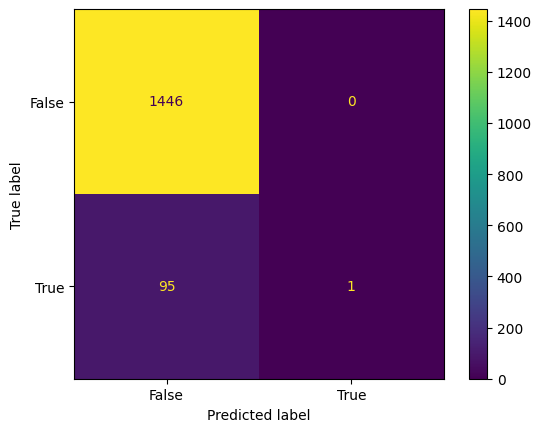

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


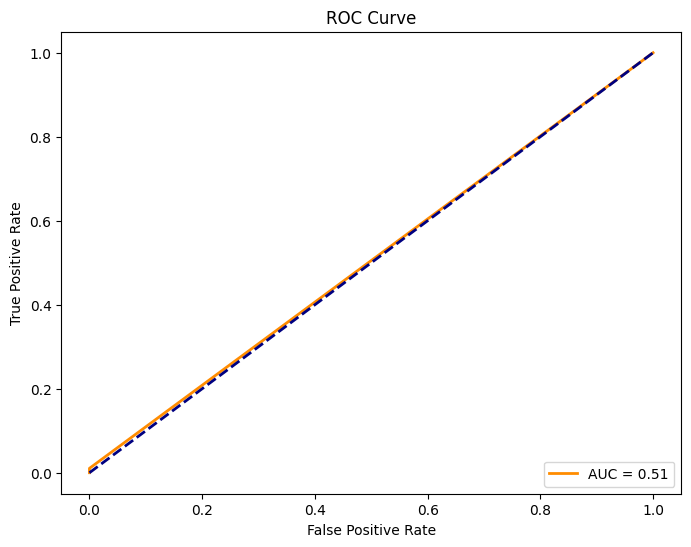

In [2]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Undersample

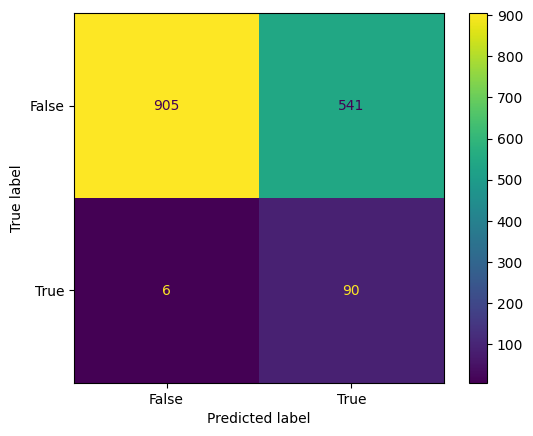

Accuracy: 0.64526588845655
Precision: 0.14263074484944532
Recall: 0.9375
Specificity: 0.6258644536652835
F1_score: 0.24759284731774417


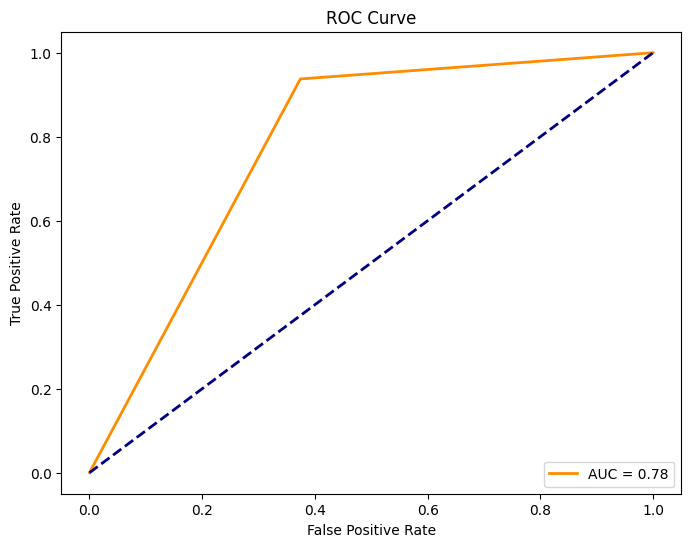

In [3]:
X_under, y_under = undersample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Oversample

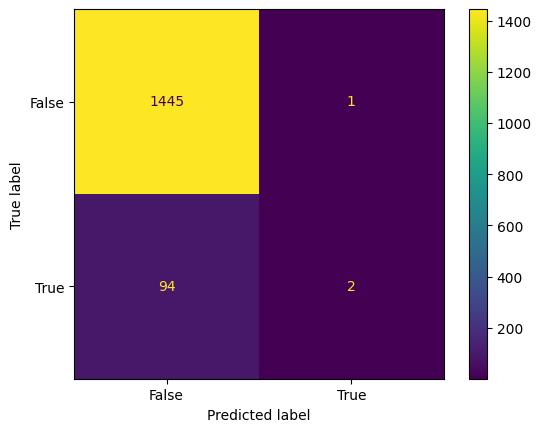

Accuracy: 0.9383916990920882
Precision: 0.6666666666666666
Recall: 0.020833333333333332
Specificity: 0.9993084370677732
F1_score: 0.0404040404040404


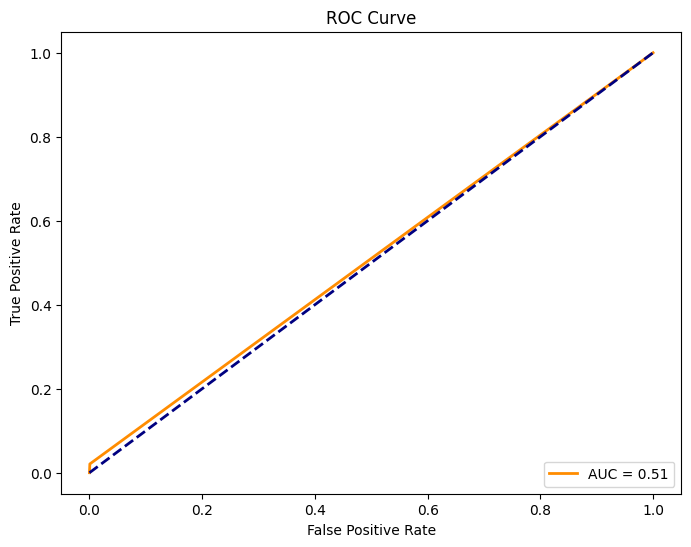

In [4]:
X_over, y_over = oversample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_over, y_over)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE

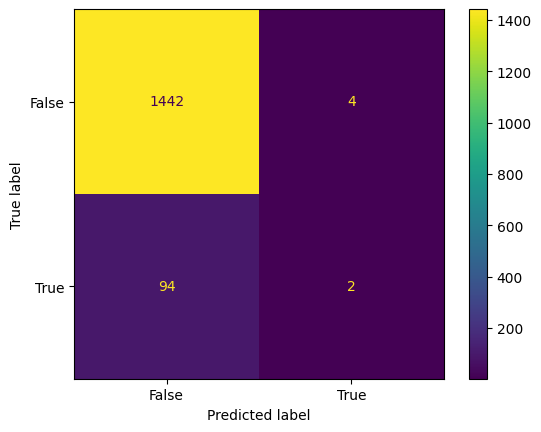

Accuracy: 0.9364461738002594
Precision: 0.3333333333333333
Recall: 0.020833333333333332
Specificity: 0.9972337482710927
F1_score: 0.0392156862745098


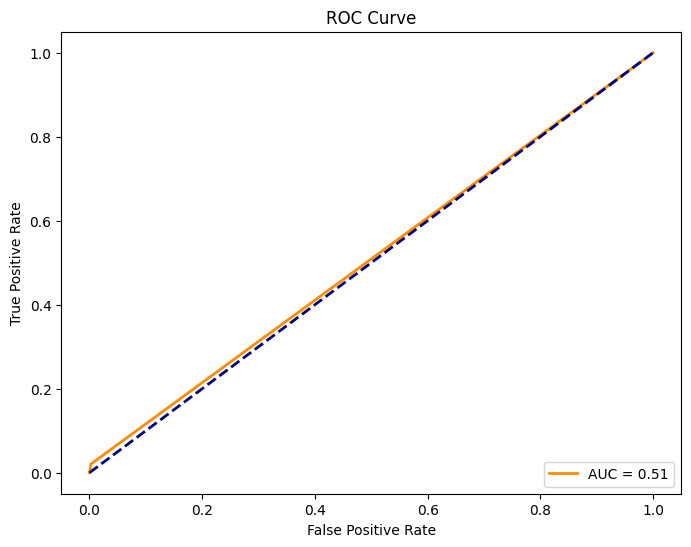

In [5]:
X_smote, y_smote = smote(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Neighbourhood Cleaning Rule

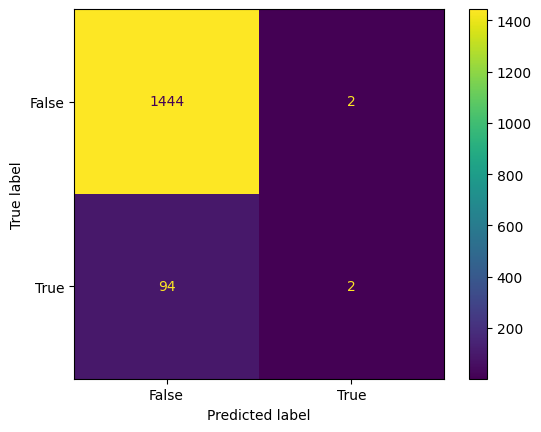

Accuracy: 0.9377431906614786
Precision: 0.5
Recall: 0.020833333333333332
Specificity: 0.9986168741355463
F1_score: 0.039999999999999994


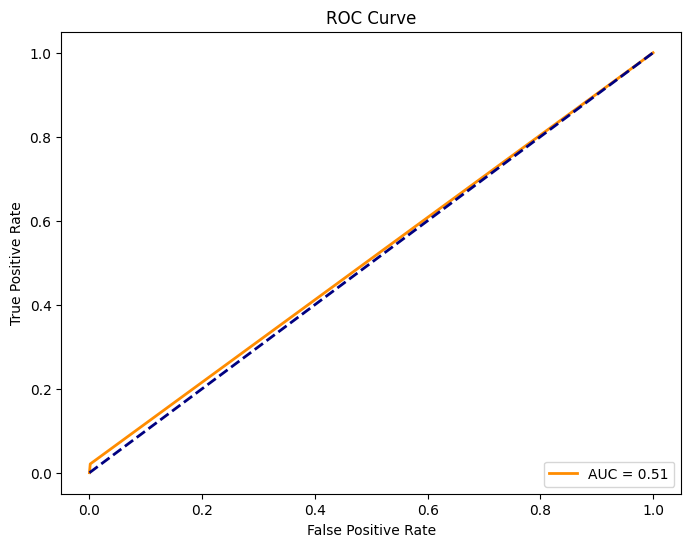

In [6]:
X_ncr, y_ncr = ncr(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_ncr, y_ncr)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Feature Selection

32 features selected: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy_Liability', 'BasePolicy_Collision', 'BasePolicy_All Perils',
       'Weekend'],
      dtype='object')


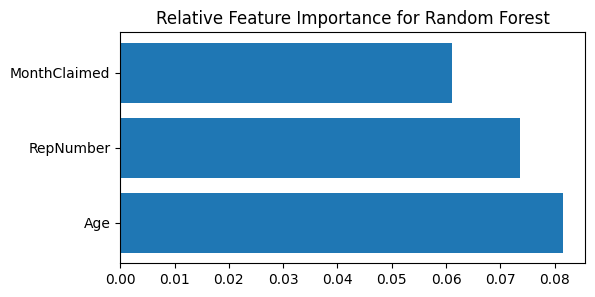

In [7]:
features = rf_select(X_train, y_train)

## Undersampling with feature selection

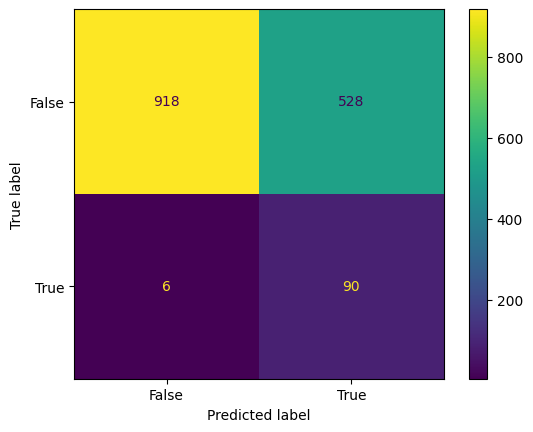

Accuracy: 0.6536964980544747
Precision: 0.14563106796116504
Recall: 0.9375
Specificity: 0.6348547717842323
F1_score: 0.25210084033613445


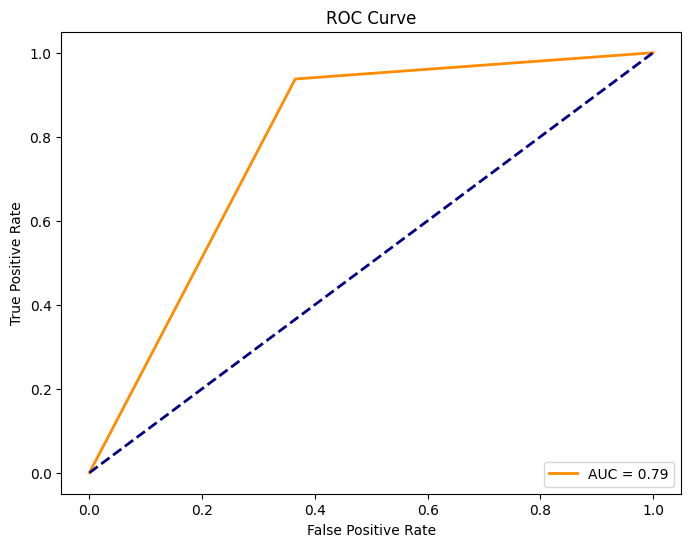

In [8]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val_under)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE with feature selection

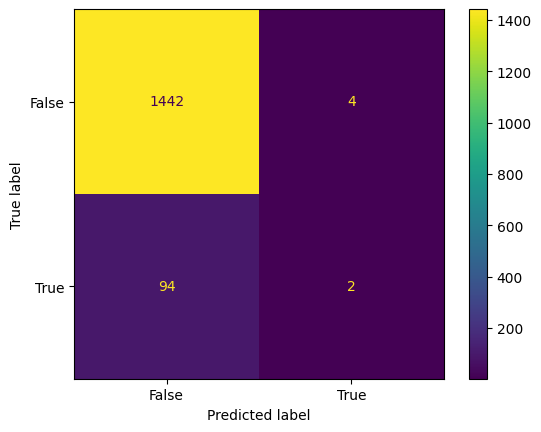

Accuracy: 0.9364461738002594
Precision: 0.3333333333333333
Recall: 0.020833333333333332
Specificity: 0.9972337482710927
F1_score: 0.0392156862745098


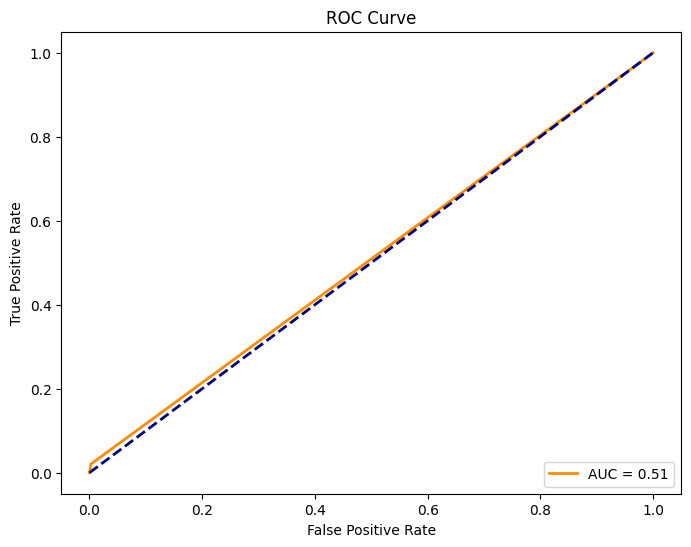

In [9]:
X_smote, y_smote = smote(X_train, y_train)
X_smote = X_smote[features]
X_val_smote = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val_smote)
show_metrics(y_val, y_pred, 1, 0)

## Undersampling with feature selection and hyperparameter tuning

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


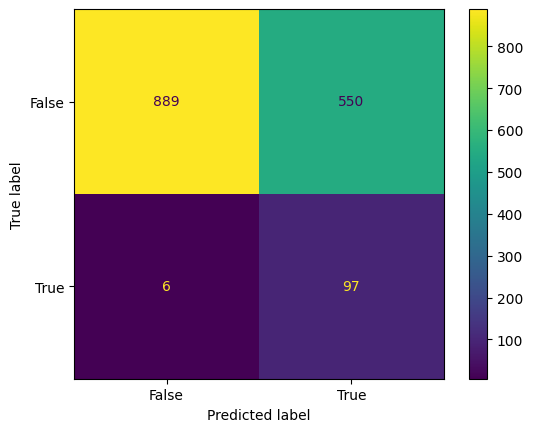

Accuracy: 0.6394293125810635
Precision: 0.14992272024729522
Recall: 0.941747572815534
Specificity: 0.6177901320361362
F1_score: 0.25866666666666666


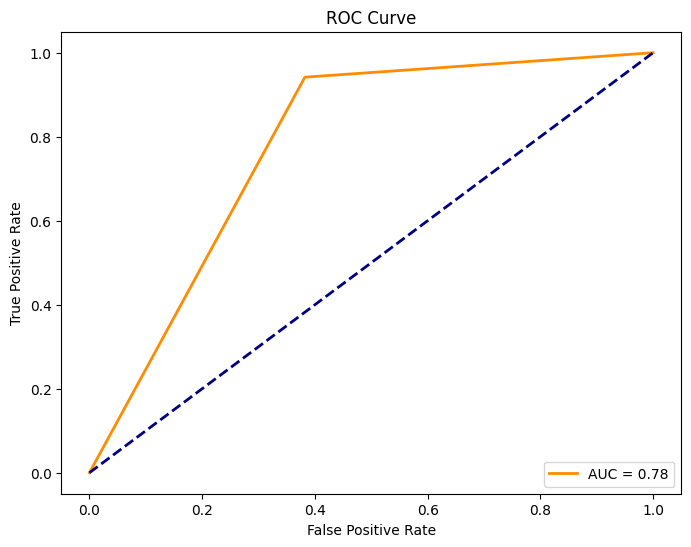

In [10]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
X_test_under = X_test[features]

grid = {'bootstrap': [True],
    'max_depth': [10, 50, 100],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 300, 1000]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid = grid, cv=5, scoring='recall')

grid_search.fit(X_under, y_under)
best_rf = grid_search.best_estimator_
print('Best hyperparameters:',  grid_search.best_params_)

y_pred = best_rf.predict(X_test_under)
show_metrics(y_test, y_pred, 1, 0)

Text(0.5, 1.0, 'Relative Feature Importance for Random Forest')

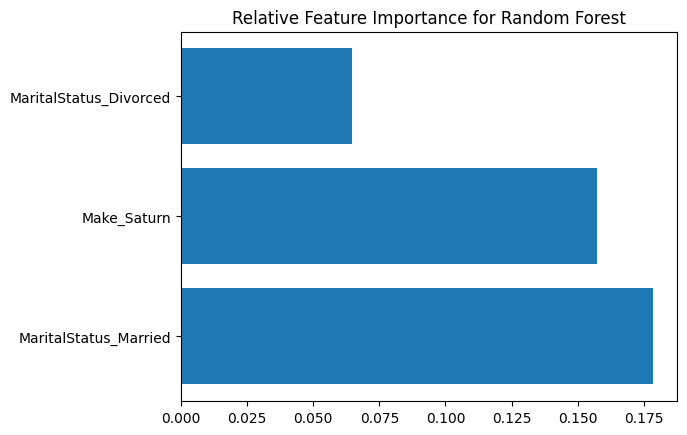

In [11]:
num = 3   
rf = best_rf

rf_importances = rf.feature_importances_
order = np.flip(np.argsort(rf_importances))[:num]
plt.barh(range(num),
        rf_importances[order],
        tick_label=X_train.columns[order])
plt.title("Relative Feature Importance for Random Forest")